In [271]:
#!pip3 install numpy --upgrade
#!pip3 install mahotas

In [272]:
import cv2
import numpy as np
import os
    #import glob
    #import mahotas as mt
from sklearn.svm import LinearSVC
import mahotas as mh
    #from mahotas import haralick
    #import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio
    #import os
import torch
import time
import timeit
    #from scipy.spatial import minkowski_distance

In [273]:

 
st = time.time()    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using Device: ",device)
torch.cuda.is_available()
torch.cuda.current_device()
if(device.type == 'cuda'):
    torch.cuda.get_device_name(0)
    print('----------------------------\nMemory Usage Details\n---------------------------------------\n')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
    print("NB:\n----\n")
    print("CACHED MEMORY\n--------------\nReturns the maximum GPU memory managed by the caching allocator in bytes for a given device.")
    print("\n***WHILES***\n")
    print("ALLOCATED MEMORY\n---------------------\nReturns the current GPU memory usage by tensors in bytes for a given device.")
   
   
    

Using Device:  cuda
----------------------------
Memory Usage Details
---------------------------------------

Allocated: 0.0 GB
Cached:    0.0 GB
NB:
----

CACHED MEMORY
--------------
Returns the maximum GPU memory managed by the caching allocator in bytes for a given device.

***WHILES***

ALLOCATED MEMORY
---------------------
Returns the current GPU memory usage by tensors in bytes for a given device.


In [274]:
# the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    #scale_percent = 50
    #width = int(imageA.shape[1] * scale_percent / 100)
    #height = int(imageA.shape[0] * scale_percent / 100)
        #width2 = int(imageB.shape[1] * scale_percent / 100)
       #height2 = int(imageB.shape[0] * scale_percent / 100)
    
        # dsize
        #dsize = (width, height)
        #output = cv2.resize(src, dsize)
    
        #cv2.imwrite(image,output) 
        
        #print(\"Error %.2f\" %err)
    
    # return the MSE, the lower the error, the more similar
    # the two images are


def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

In [275]:
#1-168 ChestCT
#169-334 Head
#335-501 BreastMRI
#502-668 AbdomenCT
#669-835 CXR
#836-1002 Hand

def precision(truePos, total):
    ans = 0
    if(truePos == 0):
        ans = 0
        
    else:
        ans = float("{:.2f}".format(truePos/total))
    
    return ans

In [276]:
 import mahotas
    
    # function to extract haralick textures from an image
def extract_features(image):
    #calculate haralick texture features for 4 types of adjacency
    textures = mh.features.haralick(image)
    #textures = mahotas.features.haralick(image)
    #textures = mahotas.features.texture(image)
    # take the mean of it and return it
    ht_mean  = textures.mean(axis=0)
    
    return ht_mean
    
    
def mahotas_label(image):
    #img=cv2.imread(image)
    img = mahotas.imread(image)
        #print(\"innn -> \",img)\n",
        
        #img2 = mahotas.colors.rgb2gray(im)
        #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        #nuclear = mahotas.demos.load(image)
       #print(\"img color -> \",imge)
        #imge2 = mahotas.imresize(img,(240,240),3)
        #imge = mahotas.colors.rgb2gray(img)
        # filtering image
        #print(\"image.shape -> \",img.shape)
        #img = img[:,:, 0]
    
        # adding gaussian filter
    nuclear = mahotas.gaussian_filter(img, 15)
    
        # setting threshold
    threshed = (nuclear > nuclear.mean())
    
        #print("Threshold -> ",threshed)
        # making is labeled image
    labeled, n = mahotas.label(threshed)
        
        #print("image label - > ",labeled)
        # getting haralick features
    h_feature = mahotas.features.haralick(labeled)
        #print("h_feature -> ",h_feature)
        #print("Features: {}".format(np.array(h_feature)))
        #print("h_feature.reshape(-1) --> ",h_feature.reshape(-1))
        #mien = float("{:.3f}".format(np.average(h_feature)))
        #print("mean features - > ",np.average(h_feature))
        #return float("{:.5f}".format(np.average(h_feature)))
    return h_feature.reshape(-1)
  
    #import mahotas
    #mien = 0
def mahotas_label2(image2):
    #img=cv2.imread(image)
    img2 = mahotas.imread(image2)
        #print("innn -> ",img)
    
        #img2 = mahotas.colors.rgb2gray(im)
        #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #nuclear = mahotas.demos.load(image)
        #print("img color -> ",imge)
        #imge2 = mahotas.imresize(img,(240,240),3)
        #imge = mahotas.colors.rgb2gray(img)
        # filtering image
        #print("image.shape -> ",img.shape)
        #img = img[:,:, 0]
        # adding gaussian filter
    nuclear2 = mahotas.gaussian_filter(img2, 15)
        # setting threshold
    threshed2 = (nuclear2 > nuclear2.mean())
        #print("Threshold -> ",threshed)
        # making is labeled image
    labeled2, n2 = mahotas.label(threshed2)
        #print("image label - > ",labeled)
        # getting haralick features
    h_feature2 = mahotas.features.haralick(labeled2)
        #print("h_feature -> ",h_feature)
        #print("Features: {}".format(np.array(h_feature)))
        #print("")
        #mien = np.average(h_feature)
        #print("mean features - > ",np.average(h_feature))
        #return float("{:.3f}".format(np.average(h_feature)))
    return h_feature2.reshape(-1)
   
  

In [277]:
def Euclidean_distance(p, q):
    dist = np.sqrt(np.sum(np.square(p-q)))
    return dist

In [278]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
def cross_validation(data):
    #X = data
    #Y = target
    X, Y = data
    logreg=LogisticRegression()
    kf = KFold(n_splits=5)
    score=cross_val_score(logreg,X,Y,scoring="accuracy",cv=kf)
    print("Cross Validation Scores are {}".format(score))
    print("Average Cross Validation score :{}".format(score.mean()))
    percent = float("{:.2f}").format(score.mean()) * 100
    print("Average Cross Validation percentage Score: ",percent)
    

In [279]:
# import model_selection module of scikit-learn
from sklearn import model_selection

def Hold_out_validation(datum):
    #holding out 40% of the data for testing (evaluating)
    X_train, X_test, y_train, y_test = datum
    X_train, X_test, y_train, y_test = model_selection.train_test_split (X, y, test_size=0.3, random_state=0)
    print("X_train-> ",X_train)
    print("X_test-> ",X_test)

In [280]:
def Recall(tp,total):
    recal = tp/total
    return float("{:.2f}".format(recal))

In [281]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
class Onek:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(117)]
            act_neg = [0 for _ in range(702)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(117-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(702-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def mSE(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(117)]
            act_neg = [0 for _ in range(702)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(117-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(702-fp)]
            y_pred = pred_pos +pred_neg
            preq = mean_squared_error(y_true, y_pred)
        print("Mean Squared Error: %.3f" % preq)
        
        
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(117)]
            act_neg = [0 for _ in range(702)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(117-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(702)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(117)]
        act_neg = [0 for _ in range(702)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(117-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(702-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
    
    def accuracy(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(117)]
            act_neg = [0 for _ in range(702)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(117-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(702-fp)]
            y_pred = pred_pos +pred_neg
            preq = accuracy_score(y_true, y_pred)
        print("Accuracy Score: %.3f" % preq)

class Fivek:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(584)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(584-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(584)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(584-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(3504)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(584)]
        act_neg = [0 for _ in range(3504)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(584-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
    
    def mSE(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(584)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(584-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
            y_pred = pred_pos +pred_neg
            preq = mean_squared_error(y_true, y_pred)
        print("Mean Squared Error: %.3f" % preq)
        
    def accuracy(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(584)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(584-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
            y_pred = pred_pos +pred_neg
            preq = accuracy_score(y_true, y_pred)
        print("Accuracy Score: %.3f" % preq)

class Tenk:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1167)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1167-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(1167)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1167-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(7002)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(1167)]
        act_neg = [0 for _ in range(7002)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(1167-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
    
    def mSE(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1167)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1167-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
            y_pred = pred_pos +pred_neg
            preq = mean_squared_error(y_true, y_pred)
        print("Mean Squared Error: %.3f" % preq) 
    def accuracy(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1167)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1167-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
            y_pred = pred_pos +pred_neg
            preq = accuracy_score(y_true, y_pred)
        print("Accuracy Score: %.3f" % preq)

class Fifteenk:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1225)]
            act_neg = [0 for _ in range(7350)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1225-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7350-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp == 0):
            req = 0
        else:
            act_pos = [1 for _ in range(1225)]
            act_neg = [0 for _ in range(7350)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1225-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(7350)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(1225)]
        act_neg = [0 for _ in range(7350)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(1225-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7350-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
    
    def mSE(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1225)]
            act_neg = [0 for _ in range(7350)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1225-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7350-fp)]
            y_pred = pred_pos +pred_neg
            preq = mean_squared_error(y_true, y_pred)
        print("Mean Squared Error: %.3f" % preq) 
        
    def accuracy(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(1225)]
            act_neg = [0 for _ in range(7350)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(1225-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7350-fp)]
            y_pred = pred_pos +pred_neg
            preq = accuracy_score(y_true, y_pred)
        print("Accuracy Score: %.3f" % preq)

In [282]:
"""
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
class Onek:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(67)]
            act_neg = [0 for _ in range(1002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(67-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(1002-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(67)]
            act_neg = [0 for _ in range(1002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(67-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(1002)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(67)]
        act_neg = [0 for _ in range(1002)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(67-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(1002-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)


class Fivek:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(250)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(250-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(250)]
            act_neg = [0 for _ in range(3504)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(250-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(3504)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(250)]
        act_neg = [0 for _ in range(3504)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(250-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(3504-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)

class Tenk:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(500)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(500-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp ==0):
            req = 0
        else:
            act_pos = [1 for _ in range(500)]
            act_neg = [0 for _ in range(7002)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(500-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(7002)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(500)]
        act_neg = [0 for _ in range(7002)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(500-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(7002-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
        

class Fifteenk:
    def precisionScore(tp,fp):
        preq = 0
        if(fp == 0 and tp ==0):
            preq = 0
        else:
            act_pos = [1 for _ in range(750)]
            act_neg = [0 for _ in range(10500)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(750-tp)] + [1 for _ in range(tp)]
            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(10500-fp)]
            y_pred = pred_pos +pred_neg
            preq = precision_score(y_true, y_pred, average="binary")
        print("Precision: %.3f" % preq)
    
    def recallScore(tp,fn):
        req = 0
        if(fn == 0 and tp == 0):
            req = 0
        else:
            act_pos = [1 for _ in range(750)]
            act_neg = [0 for _ in range(10500)]
            y_true = act_pos + act_neg
            pred_pos = [0 for _ in range(750-tp)] + [1 for _ in range(tp)]
            pred_neg = [0 for _ in range(10500)]
            y_pred = pred_pos +pred_neg
            req = recall_score(y_true, y_pred, average="binary")
        print("Recall: %.3f" % req)
        
        #Precision: Appropriate when minimizing false positives is the focus.
        #Recall: Appropriate when minimizing false negatives is the focus.
       
    def f_measure(tp,fn,fp):
        mea = 0
        act_pos = [1 for _ in range(750)]
        act_neg = [0 for _ in range(10500)]
        y_true = act_pos + act_neg
        pred_pos = [0 for _ in range(750-tp)] + [1 for _ in range(tp)]
        pred_neg = [1 for _ in range(fp)] + [0 for _ in range(10500-fp)]
        y_pred = pred_pos +pred_neg
        mea = f1_score(y_true, y_pred, average="binary")
        print('F-Measure = %.3f' % mea)
        """

'\nfrom sklearn.metrics import precision_score\nfrom sklearn.metrics import recall_score\nfrom sklearn.metrics import f1_score \nclass Onek:\n    def precisionScore(tp,fp):\n        preq = 0\n        if(fp == 0 and tp ==0):\n            preq = 0\n        else:\n            act_pos = [1 for _ in range(67)]\n            act_neg = [0 for _ in range(1002)]\n            y_true = act_pos + act_neg\n            pred_pos = [0 for _ in range(67-tp)] + [1 for _ in range(tp)]\n            pred_neg = [1 for _ in range(fp)] + [0 for _ in range(1002-fp)]\n            y_pred = pred_pos +pred_neg\n            preq = precision_score(y_true, y_pred, average="binary")\n        print("Precision: %.3f" % preq)\n    \n    def recallScore(tp,fn):\n        req = 0\n        if(fn == 0 and tp ==0):\n            req = 0\n        else:\n            act_pos = [1 for _ in range(67)]\n            act_neg = [0 for _ in range(1002)]\n            y_true = act_pos + act_neg\n            pred_pos = [0 for _ in range(67-t

In [283]:
import PIL
from PIL import Image
import cv2
from skimage import color
import os.path


TP=[]
FP=[]
FN=[]
TN=[]
#dataset_path = "I:/Medical Dataset/1K/Train/"
dataset_path = "I:/Medical Dataset/1K/Train/"
#Hold_out_validation(dataset_path)

    #class_names = ["Covid","Normal","Viral Pneumonia"]
        #image_path = os.path.join(dataset_path,class_names[0],'*')
    #dataTrainDir = "I:/Covid-19 Dataset/Covid19-dataset/train/Covid"
ed=[]
        #queryFn = "I:/Covid-19 Dataset/Covid19-dataset/test/All/0108.jpeg"
#queryFn = "I:/Medical Dataset/1K/Test/Head/001923.jpeg"
queryFn = "I:/Medical Dataset/1K/Test/Unlabeled/277.jpeg"
dataTestDir = cv2.imread(queryFn)
dataTestDir2=cv2.cvtColor(dataTestDir, cv2.COLOR_BGR2GRAY)
dataTestDir2 = cv2.resize(dataTestDir,(64,64),3)
retrieved_images=[]

    #cv2.imwrite(queryFn,dataTestDir)
    #dataTestDir.save(queryFn)
    #cv2.imwrite(queryFn,dataTestDir)
    #lbp0 = extract_features(dataTestDir)
    #lbp0 = mahotas_label(dataTestDir)
    #lbp0 = mahotas_label("I:/Covid-19 Dataset/Covid19-dataset/test/All/0108.jpeg\")
lbp0 = mahotas_label(queryFn)
    #print("Feature Extracted from Query Image -> ",lbp0)
    #ResizeImg(dataTestDir,"I:/Covid-19 Dataset/Covid19-dataset/test/Covid/COVID-00037.jpg")
dataTestDir = cv2.resize(dataTestDir,(64,64),3)
lbpf = [] 
dataset=[]
pre = 0
    #img_path = imageio.imread("I:/Covid-19 Dataset/Covid19-dataset/train/Covid/01.jpeg")
    #plt.imshow(img_path)
names=[]
f = dataset_path
print("preparing database files....")
for file in os.listdir(f):
    fimg = f+file
    names.append(fimg)
    im=cv2.imread(fimg)
    imge=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    imge = cv2.resize(im,(64,64),3)
    features = mahotas_label2(fimg)
    ed = Euclidean_distance(lbp0, features)
    lbpf.append(ed)
    dataset.append(im)
print("Database Ready!")

#cross_validation(dataset)

from sklearn.metrics import precision_score
def query():
    print("processing query file....")
    pos =0
    count=0
    #others = 0
    place = 232
    img = cv2.imread(queryFn)
            #plt.figure(figsize=(10,8))
            #plt.title("Query Image")
            #plt.subplot(231); plt.imshow(img); 
	#plt.ylabel(os.path.basename(queryFn))
    plt.subplot(231); plt.imshow(img); plt.title("Query Image"); plt.xlabel(os.path.basename(queryFn))
    print("-----------------------------------------\nploting the resulting histogram(s) \n----------------------------------\n")
    vals = range(len(lbp0))
    plt.figure(figsize=(10,5))
    plt.subplot(232); plt.bar(vals,lbp0);
    plt.title("Histogram of Query Image"); #plt.axis("off")
    valu = 0   
    str_arr=[]
    str_=[]
    precsion=0
    rec=0
    tpos = min(lbpf)
    #print("min feature mean value %.3f" %tpos)
    
    for i in range(len(lbpf)):
        if (float("{:.3f}".format(lbpf[i])) <= 0.050 ):
            retrieved_images.append(names[i])
            count+=1
            tpos = min(lbpf)
            #print("min feature mean value %.3f" %tpos)
            #pos=1
            #print("count true positive -> ", count)
            if("1K" in queryFn):
                str_arr= os.path.basename(names[i]).split(".")
            #print(str_arr)
                str_= os.path.basename(queryFn).split(".")
            #print(str_)
            #print(int(str_[0]))
            
            #HeadCT below
                if(int(str_[0]) in range(1,50)):
                    if(int(str_arr[0]) in range(118,234)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                    #BreastMRI below
                elif(int(str_[0]) in range(51,100)):
                    if(int(str_arr[0]) in range(235,351)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                    #AbdomenCT below
                elif(int(str_[0]) in range(101,150)):
                    if(int(str_arr[0]) in range(352,468)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    
                        #CXR
                elif(int(str_[0]) in range(151,200)):
                    if(int(str_arr[0]) in range(469,585)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                  #Chest
                elif(int(str_[0]) in range(201,250)):
                    if(int(str_arr[0]) in range(1,117)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                       
                 #Hand
                elif(int(str_[0]) in range(251,300)):
                    if(int(str_arr[0]) in range(586,702)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
            elif("5K" in queryFn):
                str_arr= os.path.basename(names[i]).split(".")
            #print(str_arr)
                str_= os.path.basename(queryFn).split(".")
            #print(str_)
            #print(int(str_[0]))
            #AbdomenCT below
                if(int(str_[0]) in range(0,249)):
                    if(int(str_arr[0]) in range(1,584)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    #BreastMRI below
                elif(int(str_[0]) in range(251,500)):
                    if(int(str_arr[0]) in range(835,1418)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                    #chestCT below
                elif(int(str_[0]) in range(501,750)):
                    if(int(str_arr[0]) in range(1669,2252)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    
                        #CXR
                elif(int(str_[0]) in range(751,1000)):
                    if(int(str_arr[0]) in range(2503,3086)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                  #HeadCT
                elif(int(str_[0]) in range(1001,1250)):
                    if(int(str_arr[0]) in range(3337,3920)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                       
                 #Hand
                elif(int(str_[0]) in range(1251,1500)):
                    if(int(str_arr[0]) in range(4171,54754)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
            elif("10K" in queryFn):
                str_arr= os.path.basename(names[i]).split(".")
            #print(str_arr)
                str_= os.path.basename(queryFn).split(".")
            #print(str_)
            #print(int(str_[0]))
                #Hand
                if(int(str_[0]) in range(1,500)):
                    if(int(str_arr[0]) in range(1168,2334)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                #HeadCT
                elif(int(str_[0]) in range(501,1000)):
                    if(int(str_arr[0]) in range(3502,4668)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                #CXR
                elif(int(str_[0]) in range(1001,1500)):
                    if(int(str_arr[0]) in range(2335,3501)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
            #AbdomenCT below
                elif(int(str_[0]) in range(1501,2000)):
                    if(int(str_arr[0]) in range(5836,7002)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    #BreastMRI below
                elif(int(str_[0]) in range(2001,2500)):
                    if(int(str_arr[0]) in range(4669,5835)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                    #chestCT below
                elif(int(str_[0]) in range(2501,3000)):
                    if(int(str_arr[0]) in range(1,1167)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    
                        
                        
                  
                       
                 
            elif("10pFiveK" in queryFn):
                str_arr= os.path.basename(names[i]).split(".")
            #print(str_arr)
                str_= os.path.basename(queryFn).split(".")
            #print(str_)
            #print(int(str_[0]))
            #AbdomenCT below
                if(int(str_[0]) in range(1,525)):
                    if(int(str_arr[0]) in range(1,1225)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    #BreastMRI below
                elif(int(str_[0]) in range(751,1275)):
                    if(int(str_arr[0]) in range(1751,2975)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                    #chestCT below
                elif(int(str_[0]) in range(1501,2025)):
                    if(int(str_arr[0]) in range(3501,4725)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                    
                        #CXR
                elif(int(str_[0]) in range(2251,2775)):
                    if(int(str_arr[0]) in range(5251,6475)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                 #Hand
                elif(int(str_[0]) in range(3001,3525)):
                    if(int(str_arr[0]) in range(7001,8225)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                        
                  #HeadCT
                elif(int(str_[0]) in range(3751,4275)):
                    if(int(str_arr[0]) in range(8751,9975)):
                        TP.append(os.path.basename(names[i]))
                        pos +=1
                    else:
                        FP.append(os.path.basename(names[i]))
                       
                
                      
                        
                
            #if(float("{:.3f}".format(tpos)) < lbpf[i]):
                #others+=1
                #print("others -> ",others)
                #print("Total Count -> ",count)
                    #print(f'Accuracy Score i s {accuracy_score(pos,count)}')
            
            sm = len(TP)+len(FP)+len(FN)    
            if("Test" in names[i]):
                print("------------------------------------------------------")
                #count -= 1
               
            else:
                plt.rcParams["figure.max_open_warning"]=50
                plt.figure(figsize=(10,8))
                plt.title("Target Image(s)")
                plt.subplot(233); plt.imshow(dataset[i]); 
                #plt.xlabel("Mean Squared Error %.4f" % (mse(dataTestDir2, dataset[i])))
                plt.ylabel(os.path.basename(names[i]))
            
                #valu = lbpf[i]
                #vals2 = range(len(valu))
                #plt.figure(figsize=(10,5))
                #place += 1
                #plt.subplot(place); plt.bar(vals2,lbpf[i]);
                #plt.title("Histogram of Resulting Image Image");
    #print("Query File Ready")
    #print("pos = ",pos)  
    
    print("True Positive(s) ->>>> ",len(TP))
    print("False Positive(s) ->>> ",len(FP))
    print("False Negative(s) ->>> ",len(FN))
    print("Total images Retrieved -> ",len(TP)+len(FP)+len(FN))
    #print("rTotal -> ",len(TP)+len(FN))
    #print("count ->>> ",count)
    #print("others ->>> ",others)
    #if(count > 0):
     #   pre = precision(len(TP),count)
        #rec = Recall(len(TP),count)
        #act_pos=[1 for _ in range(168)]
        #act_neg=[0 for _ in range(834)]
        #y_true = act_pos+act_neg
        #print("y_true = ",len(y_true))
        #pred_pos = [0 for _ in range(len(TP))]+[1 for _ in range(168-len(TP))]
        #pred_neg = [1 for _ in range(len(FP))]+[0 for _ in range(834-len(FP))]
        #y_pred = pred_pos+pred_neg
        #print("y_pred = ",len(y_pred))
        #precsion = precision_score(y_true,y_pred, average="binary")
        #print("Auto Precision = %.3f" % precsion)
    #else:
    pre = 0
    rec=0
    #print("Precision = ", pre)
    #print("Recall = ",rec)
    print("\n\n")
    if("1K" in queryFn):
        Onek.mSE(len(TP),len(FP))
        Onek.precisionScore(len(TP),len(FP))
        Onek.recallScore(len(TP),117-len(TP))
        Onek.f_measure(len(TP),117-len(TP),len(FP)) 
        Onek.accuracy(len(TP),len(FP)) 
    elif("5K" in queryFn):
        Fivek.mSE(len(TP),len(FP))
        Fivek.precisionScore(len(TP),len(FP))
        Fivek.recallScore(len(TP),584-len(TP))
        Fivek.f_measure(len(TP),584-len(TP),len(FP))
        Fivek.accuracy(len(TP),len(FP)) 
    elif("10K" in queryFn):
        Tenk.mSE(len(TP),len(FP))
        Tenk.precisionScore(len(TP),len(FP))
        Tenk.recallScore(len(TP),1167-len(TP))
        Tenk.f_measure(len(TP),1167-len(TP),len(FP))
        Tenk.accuracy(len(TP),len(FP)) 
    elif("10pFiveK" in queryFn):
        Fifteenk.mSE(len(TP),len(FP))
        Fifteenk.precisionScore(len(TP),len(FP))
        Fifteenk.recallScore(len(TP),1225-len(TP))
        Fifteenk.f_measure(len(TP),1225-len(TP),len(FP))
        Fifteenk.accuracy(len(TP),len(FP)) 

plt.close()

preparing database files....
Database Ready!


processing query file....
-----------------------------------------
ploting the resulting histogram(s) 
----------------------------------

True Positive(s) ->>>>  16
False Positive(s) ->>>  1
False Negative(s) ->>>  0
Total images Retrieved ->  17



Mean Squared Error: 0.125
Precision: 0.941
Recall: 0.137
F-Measure = 0.239
Accuracy Score: 0.875
CPU Execution time: 00:00:03
WALL Execution time: 00:00:00


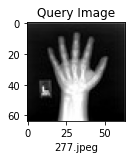

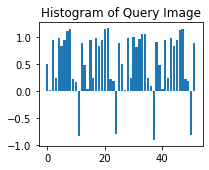

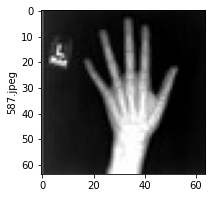

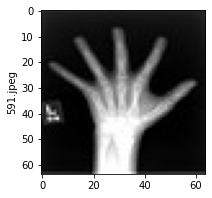

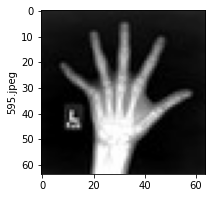

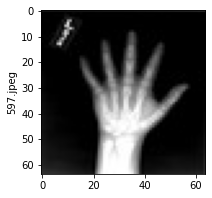

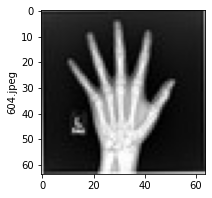

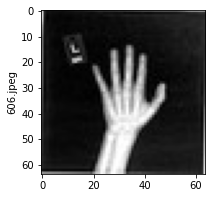

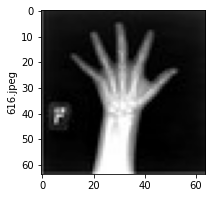

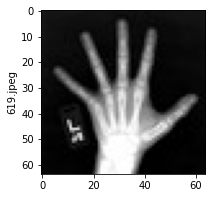

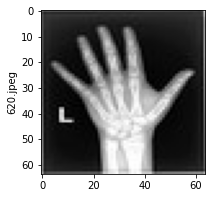

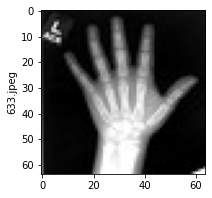

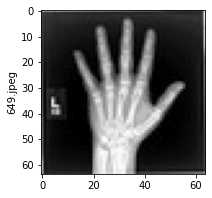

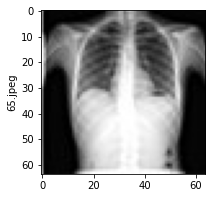

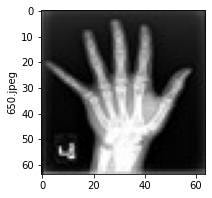

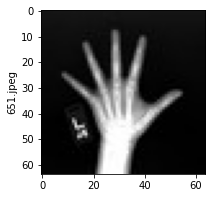

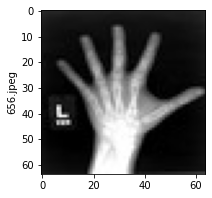

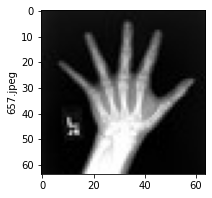

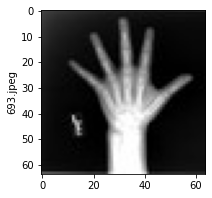

In [284]:
elapsed = time.time()-st
res = timeit.timeit(stmt='query()', globals=globals(), number=1)
print('CPU Execution time:', time.strftime("%H:%M:%S", time.gmtime(elapsed)))
print('WALL Execution time:', time.strftime("%H:%M:%S", time.gmtime(res)))

In [ ]:
#print(retrieved_images)
my=[]
for t in range(len(retrieved_images)):
    my.append(cv2.imread(retrieved_images[t]))
    #my2= cv2.imread(retrieved_images[++t])
    vert = np.concatenate(my,axis=1)
    cv2.namedWindow('Target Image',cv2.WINDOW_AUTOSIZE)
    cv2.imshow('Target Image',vert)
    cv2.waitKey(5000)
cv2.waitKey(0)
cv2.destroyAllWindows()